In [9]:
import numpy as np

In [10]:
from sklearn.datasets import load_boston
df=load_boston()
print(df)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [11]:
x=df.data
y=df.target
print(x.shape)
print(y.shape)
y=list(y)

(506, 13)
(506,)


In [12]:
import pandas as pd
frame=pd.DataFrame(x,columns=df.feature_names)
frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
for i in df.feature_names:
    mean=frame[i].mean()
    std=frame[i].std()
    frame[i]=(frame[i]-mean)/std
frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [14]:
newx=frame.values
newx.shape

(506, 13)

In [15]:
def hypotheses(x,theta):
    fin=theta[0]
    for i in range(1,14):
        fin+=theta[i]*x[i-1]
    return fin

def calculategradient(x,y,theta):
    m=x.shape[0]
    grad=np.zeros((14,))
    for i in range(m):
        X=x[i]
        ycap=hypotheses(X,theta)
        yog=y[i]
        grad[0]+=(ycap-yog)
        for i in range(1,14):
            grad[i]+=(ycap-yog)*X[i-1]
    return grad/m
def gradientDescent(x,y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((14,))
    error_list=[]
    t=[]
    for i in range(max_steps):
        grad=calculategradient(x,y,theta)
        for i in range(14):
            theta[i]=theta[i]-learning_rate*grad[i]
        t.append(theta)
        e=error(x,y,theta)
        error_list.append(e)
    return theta,error_list,t

def error(x,y,theta):
    m=x.shape[0]
    total_error=0.0
    for i in range(m):
        ycap=hypotheses(x[i],theta)
        total_error+=(ycap-y[i])**2
    return total_error/m


In [16]:
theta,error_list,t=gradientDescent(newx,y)
print(theta,error_list)

[22.53220782 -0.78231698  0.81408013 -0.27370652  0.74318937 -1.58206404
  2.89030245 -0.10353859 -2.74959397  1.46265246 -0.88375289 -1.95479885
  0.87286599 -3.64793912] [462.501887711918, 375.4123600947748, 307.71642840567506, 253.41391749999806, 209.581225568754, 174.150191672991, 145.49656865002623, 122.31664072396211, 103.5593458693273, 88.37641012120088, 76.08293402872108, 66.12576866407746, 58.05806013122357, 51.51874023402357, 46.2159942579634, 41.913929606118, 38.42182192656318, 35.585437684246, 33.28003020038987, 31.404684889104015, 29.877752631136556, 28.633161020666634, 27.617434063753613, 26.7872837640302, 26.10766347675388, 25.550194207176816, 25.091892183811197, 24.71413986198214, 24.401853658511552, 24.14281070683561, 23.927104173094367, 23.746702525249823, 23.595092870592737, 23.466992290609763, 23.358114182051168, 23.264979100901236, 23.184761616031565, 23.11516630368591, 23.054327326864787, 23.000727105046643, 22.95313043783506, 22.910531140077698, 22.87210880725522

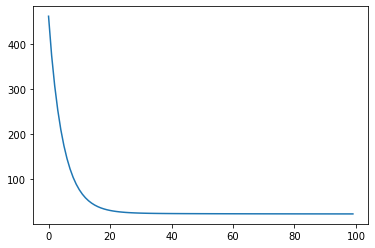

In [17]:
import matplotlib.pyplot as plt
plt.plot(error_list)

In [18]:
ycap=[]
for i in range(506):
    pred=hypotheses(newx[i],theta)
    ycap.append(pred)
ycap=np.array(ycap)
y=np.array(y)
def r2score(y,ycap):
    num=np.sum((y-ycap)**2)
    denom=np.sum((y-y.mean())**2)
    score=1-(num/denom)
    return score*100

r2score(y,ycap)

73.7467874774114